In [0]:
import numpy as np
import torch
import torch.nn as nn

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [0]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive/MNIST Data",train=True, download=True,
               transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
               batch_size=128, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST("/content/gdrive/My Drive/MNIST Data", train=False, download=True,
              transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])),
              batch_size=128, shuffle=True)

**Display a few Images**

In [0]:
import matplotlib.pyplot as plt

In [0]:
batch_id, (plot_data,target) = next(enumerate(train_loader))

torch.Size([128, 1, 28, 28])


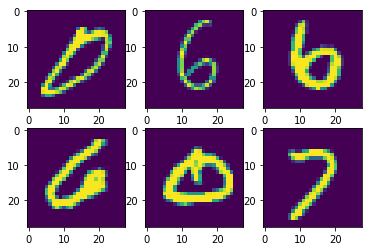

In [7]:
print (plot_data.shape)
for i in range(0,6):
  plt.subplot(2,3,i+1)
  plt.imshow(plot_data[i][0])

In [0]:
import torch.nn.functional as F

In [0]:
class Network(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    super(Network, self).__init__()
    self.linear1 = torch.nn.Linear(D_in,H)
    self.linear2 = torch.nn.Linear(H,H)
    self.linear3 = torch.nn.Linear(H,H)
    self.linear4 = torch.nn.Linear(H,H)
    self.linear5 = torch.nn.Linear(H,H)
    self.linear6 = torch.nn.Linear(H,D_out)
    self.softmax = nn.Softmax()

  def forward(self, x):
    output1 = self.linear1(x).clamp(min=0)
    output2 = self.linear2(output1).clamp(min=0)
    output3 = self.linear3(output2).clamp(min=0)
    output4 = self.linear4(output3).clamp(min=0)
    output5 = self.linear5(output4).clamp(min=0)
    output6 = self.linear6(output5)
    output = self.softmax(output6)
    return output

In [0]:
N, D_in, D_out, H = 128, 784, 10, 1024

In [11]:
epochs = 10
learning_rate = 0.01
model = Network(D_in, H, D_out)
lossFunction = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print (model)

Network(
  (linear1): Linear(in_features=784, out_features=1024, bias=True)
  (linear2): Linear(in_features=1024, out_features=1024, bias=True)
  (linear3): Linear(in_features=1024, out_features=1024, bias=True)
  (linear4): Linear(in_features=1024, out_features=1024, bias=True)
  (linear5): Linear(in_features=1024, out_features=1024, bias=True)
  (linear6): Linear(in_features=1024, out_features=10, bias=True)
  (softmax): Softmax()
)


In [0]:
for epoch in range(0,epochs):
  for i, (images,labels) in enumerate(train_loader):
    images = images.reshape(-1,28*28)
    # show_batch(images)
    y_pred = model(images)
    loss = lossFunction(y_pred, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i % 100 == 99:
        print(i, loss.item())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


99 2.367400884628296
199 2.398650884628296
299 2.351775884628296
399 2.320525884628296
99 2.367400884628296
199 2.367400884628296
